In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

# Load already updated shapefile
gdf = gpd.read_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_test.shp', encoding='latin-1')
gdf.tail()

,element_ty,osmid,amenity,name,building,parking,addr_house,addr_stree,brand,operator,...,phone_1,material,bridge,preschool,fast_food,self_servi,demolish_1,house,postal_cod,geometry
113425,relation,11220799,NaN,NaN,commercial,NaN,380,Changi Road,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.91073 1.31847, 103.91076 1.31836..."
113426,relation,14084327,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.93520 1.30690, 103.93527 1.30695..."
113427,way,469394522,NaN,Horsburgh Lighthouse,yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((104.40576 1.33021, 104.40578 1.33020..."
113428,way,469394524,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((104.40617 1.33031, 104.40612 1.33036..."
113429,way,469394526,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((104.40586 1.33040, 104.40596 1.33045..."


In [5]:
#how many unique values are in column
gdf['amenity'].unique()

array([nan, 'police', 'food_court', 'hospital', 'library',
       'place_of_worship', 'bank', 'social_facility', 'conference_centre',
       'college', 'restaurant', 'parking', 'shelter', 'clinic', 'fuel',
       'theatre', 'toilets', 'fast_food', 'cafe', 'nursing_home',
       'childcare', 'music_school', 'bar', 'public_building',
       'vehicle_inspection', 'fire_station', 'kindergarten',
       'arts_centre', 'marketplace', 'pub', 'ferry_terminal',
       'community_centre', 'dressing_room', 'car_wash', 'doctors',
       'cinema', 'monastery', 'bus_station', 'waste_transfer_station',
       'school', 'studio', 'prep_school', 'car_rental', 'ice_cream',
       'language_school', 'events_venue', 'shower', 'clubhouse', 'stage',
       'waste_disposal', 'pharmacy', 'atm', 'driving_school',
       'commercial', 'crematorium', 'post_office', 'veterinary',
       'dentist', 'social_centre', 'university', 'taxi', 'Clubhouse',
       'townhall', 'bicycle_rental', 'bicycle_parking'], dtype=ob

In [6]:
#check if column values are NaN
gdf['amenity'].isna().sum()

110299

In [4]:
#what is the amount of specific values in the column
gdf['material'].value_counts().get('metal', 0)

1

In [10]:
#drop out columns with less than 1% of non-Nan values to total
# get percentage of non-NaN values for each column
non_nan_percent = gdf.notna().sum() * 100 / len(gdf)

# get index of columns with less than 10% non-NaN values
dropped_cols = non_nan_percent[non_nan_percent < 1].index
print(dropped_cols)

Index(['parking', 'brand', 'operator', 'mapillary', 'natural', 'barrier',
       'lit', 'fee', 'layer', 'colour',
       ...
       'brewery', 'phone_1', 'material', 'bridge', 'preschool', 'fast_food',
       'self_servi', 'demolish_1', 'house', 'postal_cod'],
      dtype='object', length=197)


In [11]:
#drop columns actually
gdf = gdf.drop(columns=dropped_cols)
gdf.shape

(113430, 23)

In [25]:
gdf.head()

,osmid,amenity,name,building,addr_house,addr_stree,addr_hou_1,addr_postc,building_l,start_date,...,building_c,building_m,height,roof_colou,roof_mater,roof_shape,residentia,roof_level,addr_neigh,geometry
0,30527021,NaN,Sim Lim Square,retail,1,Rochor Canal Road,NaN,188504,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.85308 1.30254, 103.85302 1.30259..."
1,32342169,NaN,National Museum of Singapore,public,93,Stamford Road,NaN,178897,NaN,1887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.84797 1.29710, 103.84808 1.29718..."
2,32507125,police,Police Cantonment Complex,yes,391,New Bridge Road,NaN,088762,NaN,2001,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83885 1.27855, 103.83912 1.27869..."
3,32507157,NaN,NaN,office,11,Outram Road,NaN,169078,NaN,1981,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83794 1.28024, 103.83794 1.28044..."
4,32507166,NaN,NaN,public,3,Second Hospital Avenue,Health Promotion Board Building,168937,NaN,1981,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.83840 1.27965, 103.83823 1.27965..."


In [28]:
#how many unique values are in column
gdf['roof_colou'].unique()

array([nan, 'lightgrey', '#b9ac99', '#44403D', '#736354', 'grey',
       '#797459', '#957376', '#666633', '#948d7c', '#7d7f7e', '#7b898f',
       'beige', '#507084', '#ff3333', '#bb7961', '#929293', '#dbdcdf',
       '#65749F', 'cyan', '#965a2f', '#c17a57', '#9A9681', '#707565',
       '#d3cfc0', '#6a6f72', '#8b8e88', '#95908d', '#676e74', '#cac9c7',
       '#534d4d', '#c8c4b9', '#9aa4ad', '#c66b56', '#cfc0a1', '#E4E6E7',
       '#444848', '#649354', '#9AAA95', '#566684', '#ad9585', '#a4a69e',
       '#f9fdfe', '#a6b1ac', '#e7e6e3', '#4c5e69', '#f8f6f0', 'black',
       '#945752', '#D6DADB', 'darkgrey', '#c5cdd0', '#7c8579', '#9099a0',
       '#62656A', '#c3bda9', '#8C9199', '#A87B64', '#467852', '#c27e6f',
       '#b4b7b1', '#989792', '#8d9498', '#504340', '#769fa8', '#f5f6f4',
       '#90898b', '#927b81', '#EBE4D3', '#f1d6cd', '#8a8884', '#5d6166',
       '#4c605c', '#4c4a4a', '#c4bfb9', '#E4E4E4', '#E48B89', '#C8B8A7',
       '#D3D7D9', '#ae5852', '#53b8d3', '#E2897E', '#76c82e', '#

In [27]:
gdf.keys()

Index(['osmid', 'amenity', 'name', 'building', 'addr_house', 'addr_stree',
       'addr_hou_1', 'addr_postc', 'building_l', 'start_date', 'addr_count',
       'building_c', 'building_m', 'height', 'roof_colou', 'roof_mater',
       'roof_shape', 'residentia', 'roof_level', 'addr_neigh', 'geometry'],
      dtype='object')

In [31]:
#find non-coincident values from 2 columns of geopandas except NaN
nan_mask = gdf[['building_c', 'roof_colou']].isna().all(axis=1)

# get a mask indicating which rows have coincident values in both columns
coincident_mask = gdf[['building_c', 'roof_colou']].apply(lambda x: x[0] == x[1] if not x.isna().any() else False, axis=1)

# get a mask indicating which rows have non-coincident values in both columns, except NaN values
non_coincident_mask = ~(nan_mask | coincident_mask)

# create a new dataframe with non-coincident values
df3 = gdf[non_coincident_mask]

import itertools
unique_values = set(itertools.chain(*df3))

print(unique_values)

{'e', '_', 'a', 'v', 'g', 's', 'o', 'u', 'i', 'h', 'f', 'p', 'l', 't', 'y', 'm', 'd', '1', 'n', 'b', 'c', 'r'}


In [23]:
#check if column values are NaN
gdf['building_m'].isna().sum()

112273

In [24]:
#what is the amount of specific values in the column
gdf['building_m'].value_counts().get('metal', 0)

90

In [18]:
#USE only if you are aware!!!!!
gdf = gdf.drop(columns=['addr_city'])

In [35]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 113430 entries, 0 to 113429
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   osmid       113430 non-null  int64   
 1   amenity     3131 non-null    object  
 2   name        11262 non-null   object  
 3   building    113430 non-null  object  
 4   addr_house  54368 non-null   object  
 5   addr_stree  49929 non-null   object  
 6   addr_hou_1  1455 non-null    object  
 7   addr_postc  16243 non-null   object  
 8   building_l  23018 non-null   object  
 9   start_date  3618 non-null    object  
 10  addr_count  31331 non-null   object  
 11  building_c  1378 non-null    object  
 12  building_m  1157 non-null    object  
 13  height      4214 non-null    object  
 14  roof_colou  3241 non-null    object  
 15  roof_mater  3090 non-null    object  
 16  roof_shape  2126 non-null    object  
 17  residentia  7709 non-null    object  
 18  roof_level  1801

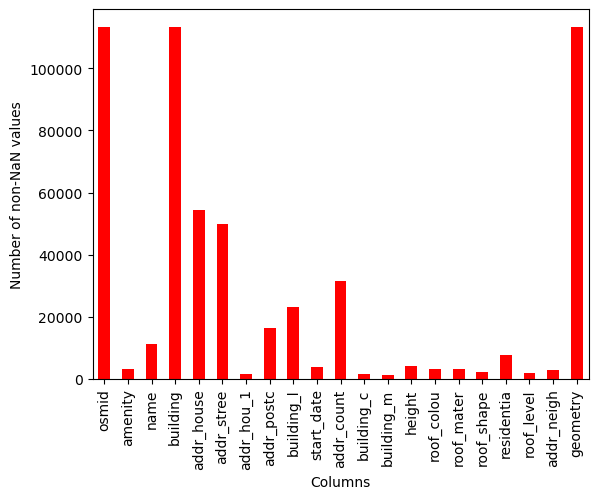

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# get the count of non-NaN values for each column
non_nan_count = gdf.count()

# create a bar plot of non-NaN counts with red color
ax = non_nan_count.plot(kind='bar', color='red')

# set the x-label and y-label
ax.set_xlabel('Columns')
ax.set_ylabel('Number of non-NaN values')

plt.show()

In [33]:
# Save the modified shapefile
gdf.to_file('C:/WORK_IAAC/submissions/Internet of Buildings/IoB_WIP/IoB_QGIS/buildings/buildings_test.shp')